In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
X = np.loadtxt('Viscosity.txt')
n = X.shape[0]
d = X.shape[1]
d -= 1
print(n,d)

499 190


In [24]:
n_train = int(n*0.8)
n_test  = n - n_train
print('ntrain',n_train,'ntest',n_test)
#X = np.random.permutation(X)

X_train = np.zeros((n_train,d+1))
X_test  = np.zeros((n_test,d+1))
Y_train = np.zeros((n_train))
Y_test = np.zeros((n_test))


b = np.ones(n_train)
X_train[:,:-1] = X[:n_train,:-1]
X_train[:,-1] = b
Y_train[:] = X[:n_train,-1]
Y_train[:] = np.log(X[:n_train,-1])


b = np.ones(n_test)
X_test[:,:-1] = X[n_train:,:-1]
X_test[:,-1] = b
#Y_test[:] = X[n_train:,-1]
Y_test[:] = np.log(X[n_train:,-1])

print(X_train.shape)
print(X_test.shape)


ntrain 399 ntest 100
(399, 191)
(100, 191)


In [25]:
w = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(X_train),X_train)), np.transpose(X_train)), Y_train)

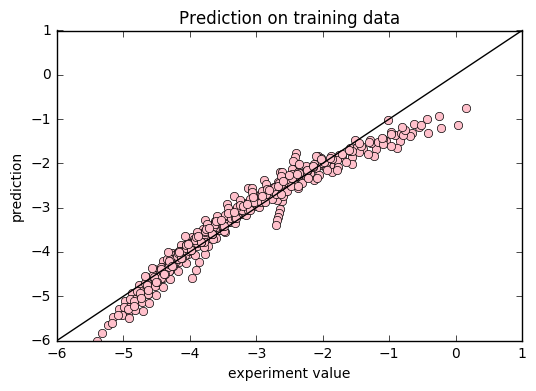

In [26]:
y_train = X_train.dot(w)
plt.plot(Y_train,y_train,"o",color ='pink')
plt.plot(np.arange(-6,1,0.0001),np.arange(-6,1,0.0001),color = 'black')
plt.axis([-6,1,-6,1])
plt.xlabel('experiment value')
plt.ylabel('prediction')
plt.title('Prediction on training data')
plt.show()

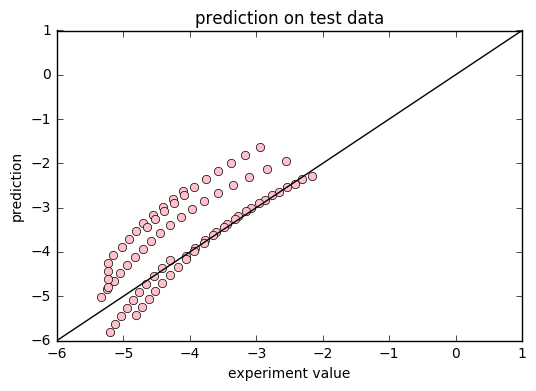

In [27]:
y_test = X_test.dot(w)
plt.plot(Y_test,y_test,"o",color ='pink')
plt.plot(np.arange(-6,1,0.0001),np.arange(-6,1,0.0001),color = 'black')
plt.axis([-6,1,-6,1])
plt.xlabel('experiment value')
plt.ylabel('prediction')
plt.title('prediction on test data')
plt.show()